<div style="background-color:#850085; padding: 10px;">
    
# Fraud detection
    

    
</div>

In [286]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score as ras
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# read train and test files

In [287]:
df = pd.read_csv("fraudTrain.csv")
test = pd.read_excel("fraudTest.xlsx")
df.head()

,ID,Time,Card Number,merchant,category,Amount,firstName,lastName,trans_num,is_fraud
0,0,1/1/2019 0:00,2.700000e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,0b242abb623afc578575680df30655b9,0.0
1,1,1/1/2019 0:00,6.300000e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,1f76529f8574734946361c461b024d99,0.0
2,2,1/1/2019 0:00,3.890000e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,a1a22d70485983eac12b5b88dad1cf95,0.0
3,3,1/1/2019 0:01,3.530000e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,6b849c168bdad6f867558c3793159a81,0.0
4,4,1/1/2019 0:03,3.760000e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,a41d7549acf90789359a9aa5346dcb46,0.0


#Show fraud rows

In [288]:
df[df["is_fraud"] == 1]

,ID,Time,Card Number,merchant,category,Amount,firstName,lastName,trans_num,is_fraud
2449,2449,1/2/2019 1:06,4.610000e+12,fraud_Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,e8a81877ae9a0a7f883e15cb39dc4022,1.0
2472,2472,1/2/2019 1:47,3.400000e+14,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,bc7d41c41103877b03232f03f1f8d3f5,1.0
2523,2523,1/2/2019 3:05,3.400000e+14,fraud_Goodwin-Nitzsche,grocery_pos,276.31,Misty,Hart,b98f12f4168391b2203238813df5aa8c,1.0
2546,2546,1/2/2019 3:38,4.610000e+12,fraud_Erdman-Kertzmann,gas_transport,7.03,Jason,Murphy,397894a5c4c02e3c61c784001f0f14e4,1.0
2553,2553,1/2/2019 3:55,3.400000e+14,fraud_Koepp-Parker,grocery_pos,275.73,Misty,Hart,7863235a750d73a244c07f1fb7f0185a,1.0
...,...,...,...,...,...,...,...,...,...,...
1000885,1000885,2/15/2020 1:11,3.020000e+13,"fraud_Schumm, Bauch and Ondricka",grocery_pos,267.75,James,Baldwin,c40834346b22cab40b88999b6f7600db,1.0
1000937,1000937,2/15/2020 1:54,3.020000e+13,fraud_Stracke-Lemke,grocery_pos,283.60,James,Baldwin,351543183b955128d8209b0d0e9f1cc3,1.0
1000983,1000983,2/15/2020 2:30,3.020000e+13,fraud_Durgan-Auer,misc_net,750.98,James,Baldwin,e21fba3f053af7ea0bd31dfed1ddf2e4,1.0
1000984,1000984,2/15/2020 2:32,2.130000e+14,fraud_Bartoletti-Wunsch,gas_transport,19.06,Joanne,Padilla,3aee71b58b68fbc5341fb7daad0e83a7,1.0


#Show non-fraud rows

In [289]:
df[df["is_fraud"] == 0]

,ID,Time,Card Number,merchant,category,Amount,firstName,lastName,trans_num,is_fraud
0,0,1/1/2019 0:00,2.700000e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,0b242abb623afc578575680df30655b9,0.0
1,1,1/1/2019 0:00,6.300000e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,1f76529f8574734946361c461b024d99,0.0
2,2,1/1/2019 0:00,3.890000e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,a1a22d70485983eac12b5b88dad1cf95,0.0
3,3,1/1/2019 0:01,3.530000e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,6b849c168bdad6f867558c3793159a81,0.0
4,4,1/1/2019 0:03,3.760000e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,a41d7549acf90789359a9aa5346dcb46,0.0
...,...,...,...,...,...,...,...,...,...,...
1002098,1002098,2/15/2020 16:40,3.060000e+13,fraud_Bins-Howell,personal_care,97.57,Morgan,Smith,7681f459e3410bfc32d5480b53adb1ad,0.0
1002099,1002099,2/15/2020 16:40,3.020000e+13,fraud_Thiel Ltd,travel,2.87,Kenneth,Doyle,dcf7de10c9699f0c11cb8dfd7a8e8f65,0.0
1002100,1002100,2/15/2020 16:40,3.460000e+14,fraud_Botsford Ltd,shopping_pos,9.09,Donna,Moreno,fa5abf4fdda69146f9c66067e9e163a2,0.0
1002101,1002101,2/15/2020 16:42,3.810000e+13,fraud_Mayert Group,shopping_pos,10.00,Marissa,Clark,cf86f1a0a541182c0078b1dc81082136,0.0


# show info of each feature(column)

In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002104 entries, 0 to 1002103
Data columns (total 10 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   ID           1002104 non-null  int64  
 1   Time         1002104 non-null  object 
 2   Card Number  1002104 non-null  float64
 3   merchant     1002104 non-null  object 
 4   category     1002104 non-null  object 
 5   Amount       1002103 non-null  float64
 6   firstName    1002103 non-null  object 
 7   lastName     1002103 non-null  object 
 8   trans_num    1002103 non-null  object 
 9   is_fraud     1002103 non-null  float64
dtypes: float64(3), int64(1), object(6)
memory usage: 76.5+ MB


# Describe numeric data in such(count, mean, etc..)

In [291]:
df.describe()

,ID,Card Number,Amount,is_fraud
count,1.002104e+06,1.002104e+06,1.002103e+06,1.002103e+06
mean,5.010515e+05,4.171374e+17,7.025616e+01,5.701011e-03
std,2.892827e+05,1.308840e+18,1.602039e+02,7.528954e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,0.000000e+00
25%,2.505258e+05,1.800000e+14,9.640000e+00,0.000000e+00
50%,5.010515e+05,3.520000e+15,4.742000e+01,0.000000e+00
75%,7.515772e+05,4.640000e+15,8.304000e+01,0.000000e+00
max,1.002103e+06,4.990000e+18,2.894890e+04,1.000000e+00


# Show count of nulls in each feature

In [292]:
print (df.isnull().sum())

ID             0
Time           0
Card Number    0
merchant       0
category       0
Amount         1
firstName      1
lastName       1
trans_num      1
is_fraud       1
dtype: int64


# Fill the null values with mean in each of is_fraud/Amount columns

In [293]:
#find null in is_fruad/Amount col and replace it with mean
df['is_fraud'].fillna(df['is_fraud'].mean(), inplace=True)
df['Amount'].fillna(df['Amount'].mean(), inplace=True)

#find null in is_fruad/Amount col and replace it with mean
test['is_fraud'].fillna(test['is_fraud'].mean(), inplace=True)
test['Amount'].fillna(test['Amount'].mean(), inplace=True)

# Drop useless rows(containing nulls) in each first/last names and trans_num columns

In [294]:
#drop row if first name /last name/trans_num is null 'Not important'

df = df.dropna(subset=['firstName', 'lastName', 'trans_num'])

#drop row if first name /last name/trans_num is null 'Not important'

test = test.dropna(subset=['firstName', 'lastName', 'trans_num'])

In [295]:
print (df.isnull().sum())

ID             0
Time           0
Card Number    0
merchant       0
category       0
Amount         0
firstName      0
lastName       0
trans_num      0
is_fraud       0
dtype: int64


# Check for duplicates

In [296]:
sum(df.duplicated()) #no duplicate to handle it

0

# Print type of Time column

In [297]:
type(df['Time'].iloc[0])

str

# change formate from str to datetime

In [298]:
df['Time']=pd.to_datetime(df['Time'])
test['Time']=pd.to_datetime(test['Time'])

In [299]:
type(df['Time'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [300]:
print(df['Time'])

0         2019-01-01 00:00:00
1         2019-01-01 00:00:00
2         2019-01-01 00:00:00
3         2019-01-01 00:01:00
4         2019-01-01 00:03:00
                  ...        
1002098   2020-02-15 16:40:00
1002099   2020-02-15 16:40:00
1002100   2020-02-15 16:40:00
1002101   2020-02-15 16:42:00
1002102   2020-02-15 16:42:00
Name: Time, Length: 1002103, dtype: datetime64[ns]


In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1002103 entries, 0 to 1002102
Data columns (total 10 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   ID           1002103 non-null  int64         
 1   Time         1002103 non-null  datetime64[ns]
 2   Card Number  1002103 non-null  float64       
 3   merchant     1002103 non-null  object        
 4   category     1002103 non-null  object        
 5   Amount       1002103 non-null  float64       
 6   firstName    1002103 non-null  object        
 7   lastName     1002103 non-null  object        
 8   trans_num    1002103 non-null  object        
 9   is_fraud     1002103 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 84.1+ MB


# Show the count of different types(object/int/float) of columns

In [302]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int_ = (df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

fl = (df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))

Categorical variables: 5
Integer variables: 1
Float variables: 3


# Plot the number of occurence of each item in **category**

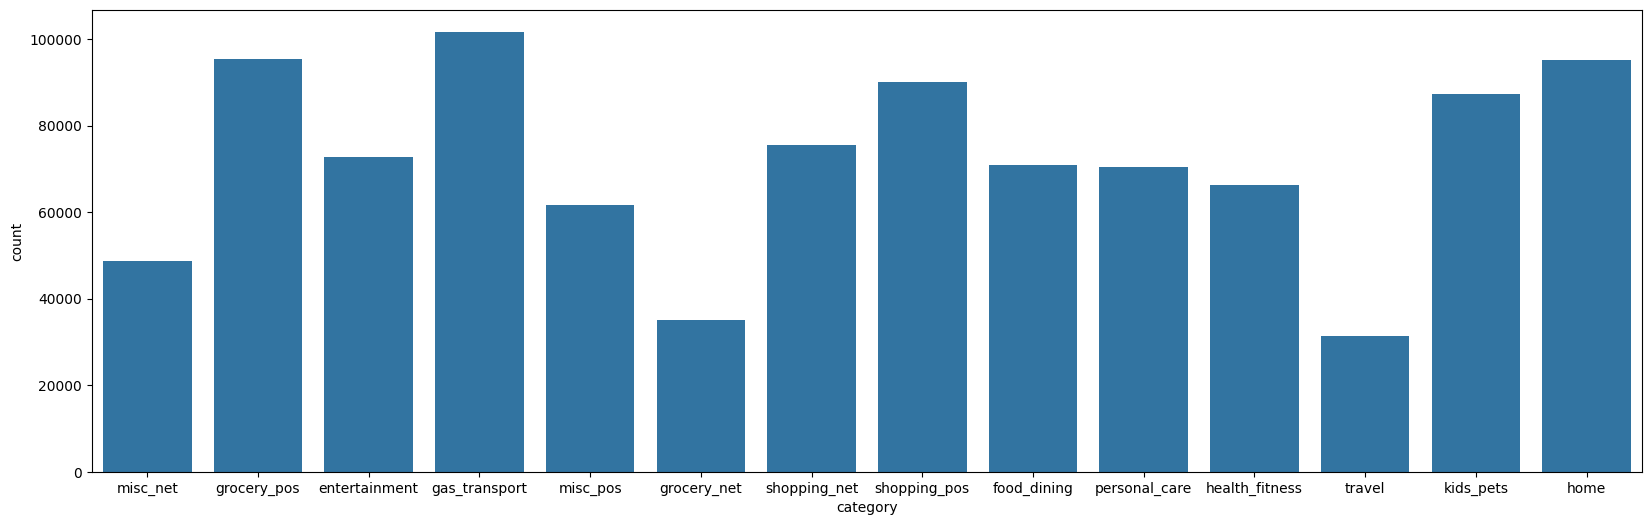

In [303]:
# Set the size of the figure
plt.figure(figsize=(20, 6))

# Plot the countplot
sns.countplot(x='category', data=df)

# Show the plot
plt.show()

# Plot the relationship between the 'category' column and the 'Amount'

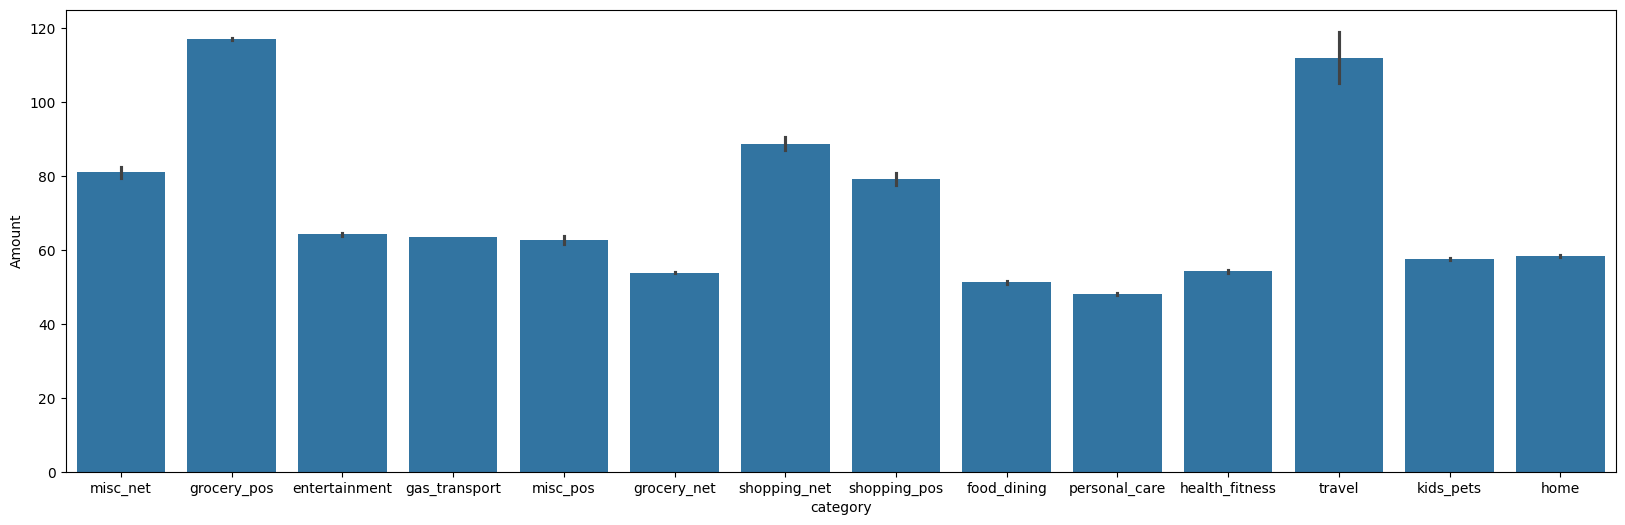

In [304]:
plt.figure(figsize=(20, 6))
sns.barplot(x='category', y='Amount', data=df)
plt.show()

# Show count of fraud/non-fraud in both files

In [305]:
df['is_fraud'].value_counts()

is_fraud
0.0    996390
1.0      5713
Name: count, dtype: int64

In [306]:
test['is_fraud'].value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

# Plot a graph showing most fraud transactions through Time

<ipython-input-307-c2b74c7c4069>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Time'], bins=50)


<Axes: xlabel='Time', ylabel='Density'>

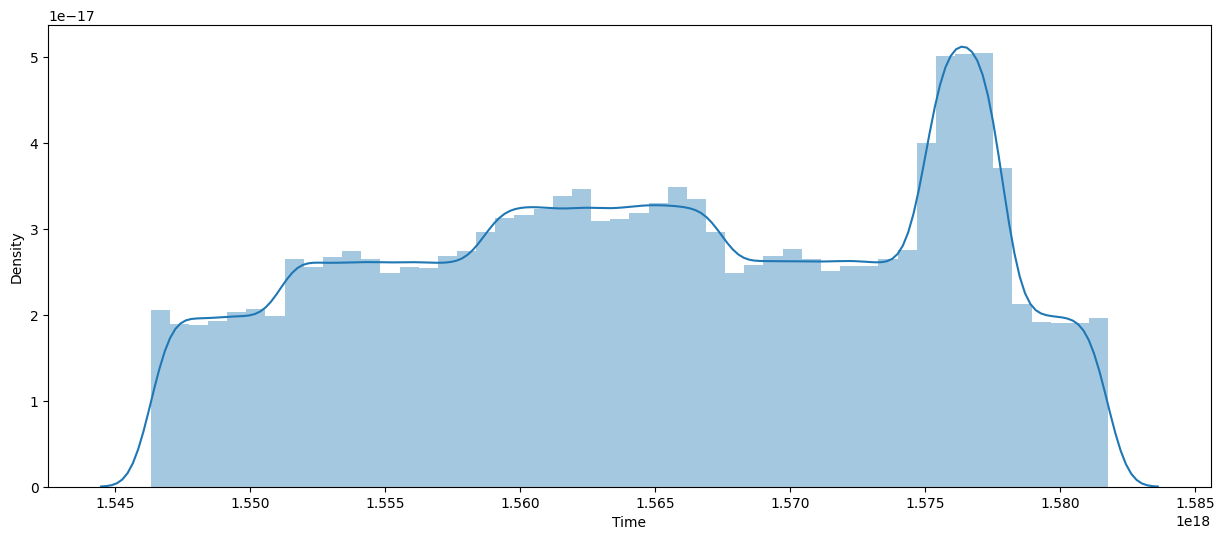

In [307]:
plt.figure(figsize=(15, 6))
sns.distplot(df['Time'], bins=50)

# Label encode category/merchant columns for better use
# Scale the Amount column for better use and put them in a specific range
# Create a new feature called Hour

In [308]:
label_encoder = LabelEncoder()
df['category_encoded'] = label_encoder.fit_transform(df['category'])
df['merchant_encoded'] = label_encoder.fit_transform(df['merchant'])
scaler = StandardScaler()
df['Amount_scaled'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['Hour'] = df['Time'].dt.hour


test['category_encoded'] = label_encoder.fit_transform(test['category'])
test['merchant_encoded'] = label_encoder.fit_transform(test['merchant'])
test['Amount_scaled'] = scaler.fit_transform(test['Amount'].values.reshape(-1, 1))
test['Hour'] = test['Time'].dt.hour

df.head()


,ID,Time,Card Number,merchant,category,Amount,firstName,lastName,trans_num,is_fraud,category_encoded,merchant_encoded,Amount_scaled,Hour
0,0,2019-01-01 00:00:00,2.700000e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,0b242abb623afc578575680df30655b9,0.0,8,514,-0.407519,0
1,1,2019-01-01 00:00:00,6.300000e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,1f76529f8574734946361c461b024d99,0.0,4,241,0.230793,0
2,2,2019-01-01 00:00:00,3.890000e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,a1a22d70485983eac12b5b88dad1cf95,0.0,0,390,0.935395,0
3,3,2019-01-01 00:01:00,3.530000e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,6b849c168bdad6f867558c3793159a81,0.0,2,360,-0.157650,0
4,4,2019-01-01 00:03:00,3.760000e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,a41d7549acf90789359a9aa5346dcb46,0.0,9,297,-0.176626,0


# Plot a graph showing most fraud transactions through Hours of day

<ipython-input-309-1a5cdcf761f0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Hour'], bins=50)


<Axes: xlabel='Hour', ylabel='Density'>

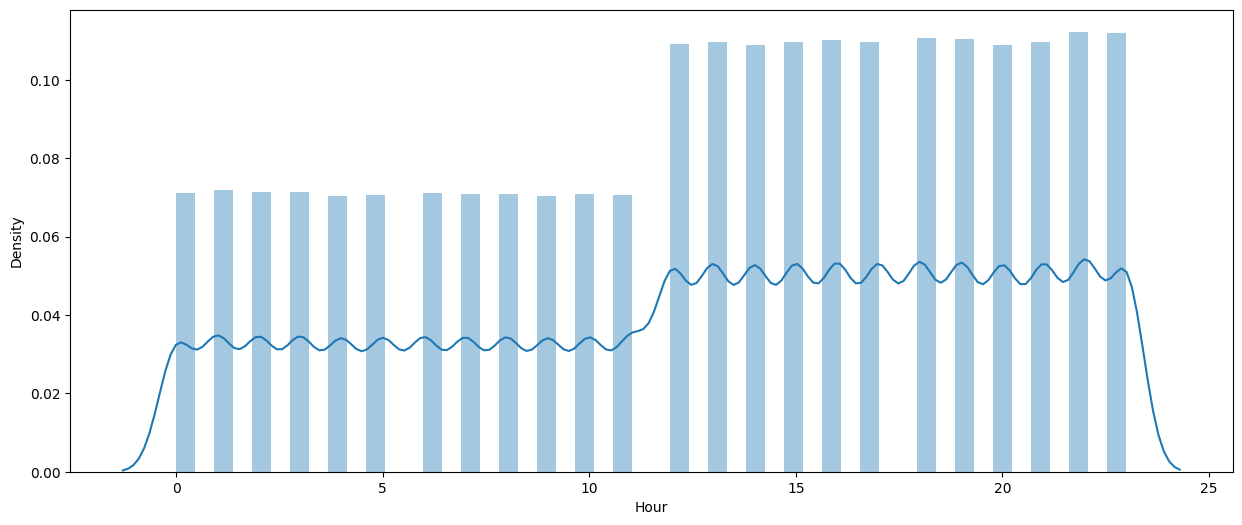

In [309]:
plt.figure(figsize=(15, 6))
sns.distplot(df['Hour'], bins=50)

# create (Cardholder Name/Average Amount By Cardholder/Amount Diff From Average) features and sort data by time

In [310]:
df['Cardholder Name'] = df['firstName'] + ' ' + df['lastName']
# Calculate the average transaction amount for each cardholder
df['Average Amount By Cardholder'] = df.groupby('Cardholder Name')['Amount'].transform('mean')

# Calculate the difference between current transaction amount and average
df['Amount Diff From Average'] = df['Amount'] - df['Average Amount By Cardholder']

# Sort the DataFrame by 'Time' column in ascending order
df = df.sort_values('Time')


test['Cardholder Name'] = test['firstName'] + ' ' + test['lastName']
# Calculate the average transaction amount for each cardholder
test['Average Amount By Cardholder'] = test.groupby('Cardholder Name')['Amount'].transform('mean')

# Calculate the difference between current transaction amount and average
test['Amount Diff From Average'] = test['Amount'] - test['Average Amount By Cardholder']

# Sort the DataFrame by 'Time' column in ascending order
test = test.sort_values('Time')

df.head()


,ID,Time,Card Number,merchant,category,Amount,firstName,lastName,trans_num,is_fraud,category_encoded,merchant_encoded,Amount_scaled,Hour,Cardholder Name,Average Amount By Cardholder,Amount Diff From Average
0,0,2019-01-01 00:00:00,2.700000e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,0b242abb623afc578575680df30655b9,0.0,8,514,-0.407519,0,Jennifer Banks,85.430418,-80.460418
1,1,2019-01-01 00:00:00,6.300000e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,1f76529f8574734946361c461b024d99,0.0,4,241,0.230793,0,Stephanie Gill,54.206860,53.023140
2,2,2019-01-01 00:00:00,3.890000e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,a1a22d70485983eac12b5b88dad1cf95,0.0,0,390,0.935395,0,Edward Sanchez,64.479815,155.630185
3,3,2019-01-01 00:01:00,3.530000e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,6b849c168bdad6f867558c3793159a81,0.0,2,360,-0.157650,0,Jeremy White,75.065105,-30.065105
4,4,2019-01-01 00:03:00,3.760000e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,a41d7549acf90789359a9aa5346dcb46,0.0,9,297,-0.176626,0,Tyler Garcia,93.726350,-51.766350


# Drop unneeded features

In [311]:
df.drop(['ID', 'Card Number', 'trans_num',
         'firstName', 'lastName','merchant', 'Cardholder Name', 'trans_num', 'category'], axis=1, inplace=True)


test.drop(['ID', 'Card Number', 'trans_num',
         'firstName', 'lastName','merchant', 'Cardholder Name', 'trans_num', 'category'], axis=1, inplace=True)

df.head()

,Time,Amount,is_fraud,category_encoded,merchant_encoded,Amount_scaled,Hour,Average Amount By Cardholder,Amount Diff From Average
0,2019-01-01 00:00:00,4.97,0.0,8,514,-0.407519,0,85.430418,-80.460418
1,2019-01-01 00:00:00,107.23,0.0,4,241,0.230793,0,54.206860,53.023140
2,2019-01-01 00:00:00,220.11,0.0,0,390,0.935395,0,64.479815,155.630185
3,2019-01-01 00:01:00,45.00,0.0,2,360,-0.157650,0,75.065105,-30.065105
4,2019-01-01 00:03:00,41.96,0.0,9,297,-0.176626,0,93.726350,-51.766350


# Draw a correlation using selected features

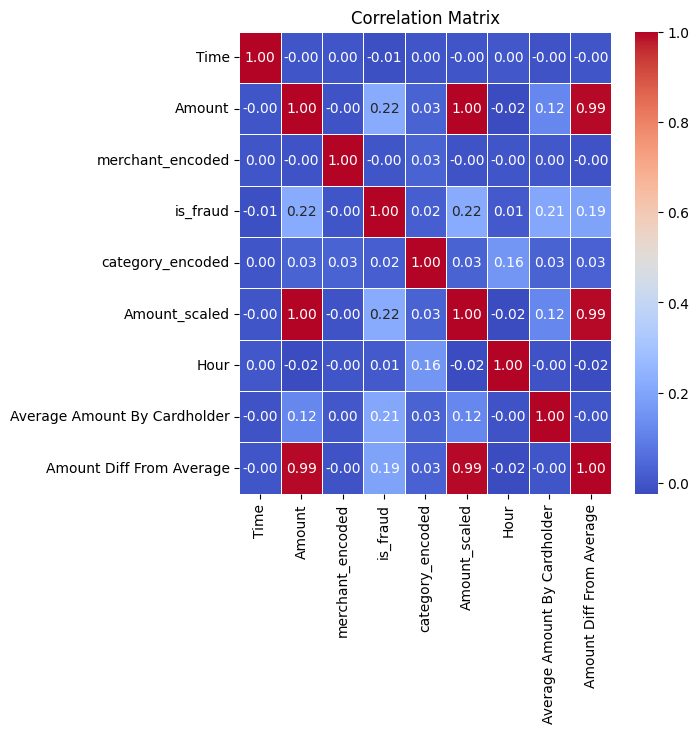

In [312]:
# Select the desired features
selected_features = ['Time', 'Amount','merchant_encoded', 'is_fraud', 'category_encoded', 'Amount_scaled', 'Hour', 'Average Amount By Cardholder', 'Amount Diff From Average']

# Create a subset DataFrame with the selected features
subset_df = df[selected_features]

# Calculate the correlation matrix
corr_matrix = subset_df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(6, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# was used in case spliting train file

In [313]:
X = df.drop(['is_fraud', 'Time'], axis=1)
y = df['is_fraud']

# Print number of rows and columns for x, y dataframes

In [314]:
X.shape, y.shape

((1002103, 7), (1002103,))

# train using train file and test using test file

In [315]:
X_train= df.drop(['is_fraud', 'Time'], axis=1)
y_train= df['is_fraud']
X_test=test.drop(['is_fraud', 'Time'], axis=1)
y_test= test['is_fraud']

# testing data through 3 models

In [316]:
models = [LogisticRegression(), XGBClassifier(),
          RandomForestClassifier(n_estimators=7,
                                 criterion='entropy',
                                 random_state=7)]

for i in range(len(models)):
    models[i].fit(X_train, y_train)
    print(f'{models[i]} : ')

    train_preds = models[i].predict_proba(X_train)[:, 1]
    print('Training Accuracy : ', ras(y_train, train_preds))

    y_preds = models[i].predict_proba(X_test)[:, 1]
    print('Validation Accuracy : ', ras(y_test, y_preds))
    print()

LogisticRegression() : 
Training Accuracy :  0.8505603126815197
Validation Accuracy :  0.8764444376846694

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  0.9993118618742278
Validation Accuracy :  0.9966195126876445

RandomForestClassifier(criterion='entropy', n_est

In [317]:
# Train your fraud detection model
# Replace this with your actual model training code
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [318]:
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.998123152168632
Precision: 0.7924628450106157
Recall: 0.696037296037296
F1-score: 0.741126830479027


# Showing the precision and recall based on XGClassifier(suitable model)

In [319]:
XGBClassifier_model = XGBClassifier()
XGBClassifier_model.fit(X_test, y_test)
XGBClassifier_model.score(X_test, y_test)
print(classification_report(y_test, XGBClassifier_model.predict(X_test), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00    553574
       Fraud       0.95      0.78      0.86      2145

    accuracy                           1.00    555719
   macro avg       0.98      0.89      0.93    555719
weighted avg       1.00      1.00      1.00    555719



# other modelling algorithms

In [320]:
import sklearn
import scipy

from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
from sklearn.impute import SimpleImputer

from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score as ras
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

In [321]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

train_accuracy = logistic_model.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)
print("Training Classification Report:")
print(classification_report(y_train, logistic_model.predict(X_train), target_names=['Not Fraud', 'Fraud']))



#Evaluate the model on test data
test_accuracy = logistic_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)
print("Test Classification Report:")
print(classification_report(y_test, logistic_model.predict(X_test), target_names=['Not Fraud', 'Fraud']))

Training Accuracy: 0.9943868045500313
Training Classification Report:
              precision    recall  f1-score   support

   Not Fraud       0.99      1.00      1.00    996390
       Fraud       0.55      0.09      0.16      5713

    accuracy                           0.99   1002103
   macro avg       0.77      0.55      0.58   1002103
weighted avg       0.99      0.99      0.99   1002103

Test Accuracy: 0.9957874393353475
Test Classification Report:
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00    553574
       Fraud       0.31      0.08      0.12      2145

    accuracy                           1.00    555719
   macro avg       0.65      0.54      0.56    555719
weighted avg       0.99      1.00      0.99    555719



In [322]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, max_depth=1, random_state=0)
gbc.fit(X_train, y_train)
print(classification_report(y_train, gbc.predict(X_train), target_names=['Not Fraud', 'Fraud']))

print(classification_report(y_test, gbc.predict(X_test), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.99      1.00      1.00    996390
       Fraud       0.78      0.05      0.10      5713

    accuracy                           0.99   1002103
   macro avg       0.89      0.53      0.55   1002103
weighted avg       0.99      0.99      0.99   1002103

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00    553574
       Fraud       0.72      0.05      0.10      2145

    accuracy                           1.00    555719
   macro avg       0.86      0.53      0.55    555719
weighted avg       1.00      1.00      0.99    555719



In [323]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint

shallow_nn = Sequential()
shallow_nn.add(InputLayer((X_train.shape[1],)))
shallow_nn.add(Dense(2, 'relu'))
shallow_nn.add(BatchNormalization())
shallow_nn.add(Dense(1, 'sigmoid'))

checkpoint = ModelCheckpoint('shallow_nn', save_best_only=True)
shallow_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
shallow_nn.summary()
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=2, n_jobs=-1)
rf.fit(X_train, y_train)

print(classification_report(y_train, rf.predict(X_train), target_names=['Not Fraud', 'Fraud']))


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 2)                 16        
                                                                 
 batch_normalization_1 (Bat  (None, 2)                 8         
 chNormalization)                                                
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 27 (108.00 Byte)
Trainable params: 23 (92.00 Byte)
Non-trainable params: 4 (16.00 Byte)
_________________________________________________________________
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00    996390
       Fraud       0.95      0.24      0.38      5713

    accuracy                           1.00   100210